In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sn

In [17]:
dat = pd.read_csv('RENPHO-Erich.csv')
dat.columns = dat.columns.astype(str)

Dictionary for datetime strip syntax and table is https://www.journaldev.com/23365/python-string-to-datetime-strptime

In [3]:
def convert_time(dat):
    dat = dat[0:12]
    date = list([val for val in dat if val.isalnum()])
    date = "".join(date)
    x = datetime.strptime(date,'%b%d%Y')
    return x

def convert_cat(column):
    column = column.astype(str)
    label = ["Lb","%","kcal"]
    return column.replace(regex=label,value="").astype(float)

def nan_imputer(dat_column):
    mean = dat_column.describe().loc["mean"]
    return dat_column.fillna(value=mean).astype(float)

def normalize(dat_column):
    x_min = dat_column.describe().loc["min"]
    x_max = dat_column.describe().loc["max"]
    x_new = [(x - x_min)/(x_max-x_min) for x in dat_column]
    return x_new

In [4]:
def transform_data(dat):
    cat_data = dat[["Weight","Body Fat","Fat-free Body Weight","Subcutaneous Fat",
                    "Body Water","Skeletal Muscle","Muscle Mass","Bone Mass","Protein","BMR"]]
    float_dat = dat[["BMI","Visceral Fat","Metabolic Age"]]
    cat_data_adj = cat_data.apply(convert_cat)
    converted_time = dat["Time of Measurement"].apply(convert_time)
    return pd.DataFrame.join(cat_data_adj,converted_time)

Now for normalizing data
$$x_{new} = x_i - x_{min} / x_{max} - x_{min}$$
and to combine all of our above functions into one single ETL process

In [14]:
def ETL(df):
    df = transform_data(df)
    df_new = df.drop(columns="Time of Measurement")
    df_new = df_new.apply(nan_imputer)
    return df_new.apply(normalize).join(df["Time of Measurement"])

In [24]:
new_df = ETL(dat)
new_df

,Weight,Body Fat,Fat-free Body Weight,Subcutaneous Fat,Body Water,Skeletal Muscle,Muscle Mass,Bone Mass,Protein,BMR,Time of Measurement
0,0.852174,0.833333,0.852941,0.789474,0.176471,0.133333,0.846154,1.000000,0.000000,0.857143,2020-01-17
1,0.921739,0.916667,0.926471,0.894737,0.058824,0.066667,0.923077,1.000000,0.000000,0.932331,2020-01-15
2,0.947826,0.916667,0.941176,0.894737,0.058824,0.066667,0.938462,1.000000,0.000000,0.947368,2020-01-13
3,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2020-01-10
4,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2020-01-10
5,0.686957,0.708333,0.691176,0.736842,0.294118,0.333333,0.692308,0.666667,0.200000,0.691729,2019-12-30
6,0.686957,0.708333,0.691176,0.736842,0.294118,0.333333,0.692308,0.666667,0.200000,0.691729,2019-12-30
7,0.313043,0.333333,0.308824,0.421053,0.647059,0.666667,0.307692,0.333333,0.600000,0.315789,2019-11-11
8,0.356522,0.375000,0.352941,0.368421,0.647059,0.666667,0.353846,0.333333,0.600000,0.368421,2019-08-13
9,0.426087,0.416667,0.426471,0.421053,0.529412,0.600000,0.430769,0.333333,0.600000,0.436090,2019-08-11


Below is a hetamap of the correlation matrix of all my recorded physical data

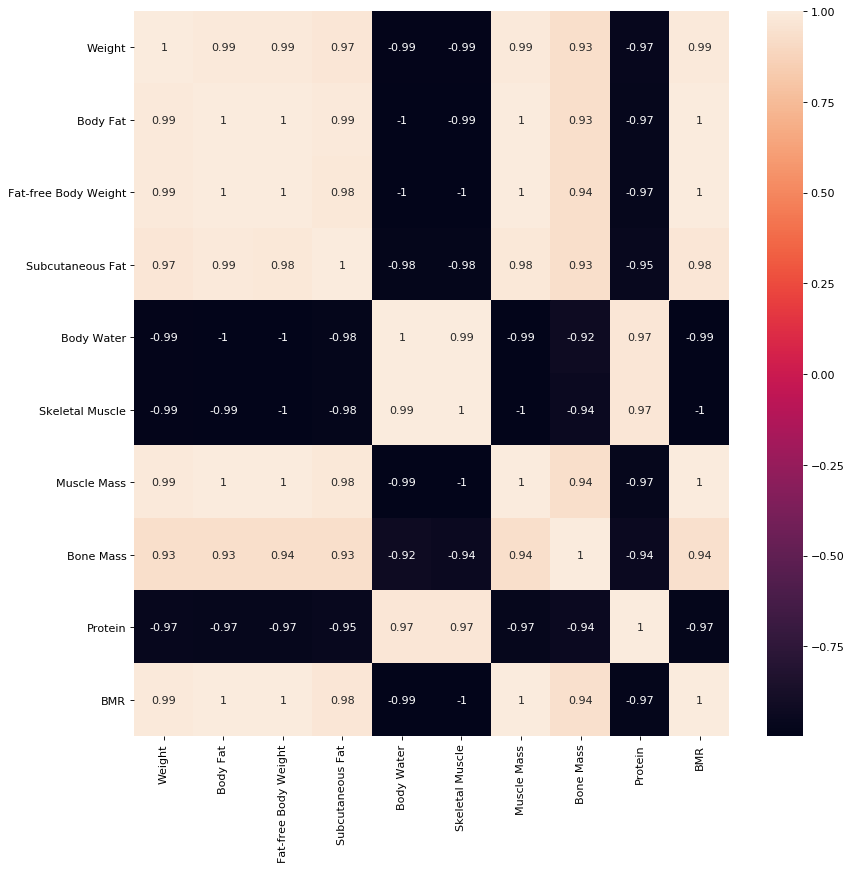

In [70]:
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
sn.heatmap(new_df.corr(), annot=True)